## US Accidents Dataset Analysis
### Dataset Columns:

Severity: Severity of the accident.

StartTime: Time when the accident started.

EndTime: Time when the accident ended.

StartLat: Latitude of the accident location.

StartLng: Longitude of the accident location.

Distance: Distance affected by the accident.

Street: Street where the accident occurred.

City: City where the accident occurred.

State: State where the accident occurred.

Zipcode: Zipcode of the accident location.

Crossing, GiveWay, Junction, NoExit, Railway, Roundabout, Station, Stop, TrafficCalming, TrafficSignal: Boolean indicators for presence of these features related to the accident.
### Code Description:
This code performs exploratory data analysis (EDA) and visualization on the accidents dataset:

### Data Loading and Preparation:
Loads the dataset ('accidents.csv') and selects relevant columns.
Drops rows with missing values in relevant columns.
Converts StartTime and EndTime columns to datetime format.
Boolean columns are converted to strings to facilitate plotting and further processing.
## Data Exploration and Visualization:
### Accident Severity Distribution:
A count plot is created to visualize the distribution of accident severities.

### Accidents by Traffic Signal Presence:
If the TrafficSignal column is present, a count plot visualizes the number of accidents with and without traffic signals. Another count plot shows the accidents by severity and traffic signal presence.

### Chi-Square Test:
A chi-square test is performed to analyze the relationship between accident severity and traffic signal presence, if the TrafficSignal column is available.

### Accidents by Day of the Week:
If the StartTime column is available, the day of the week is extracted, and a count plot visualizes accidents by day.

### Accidents by Hour of the Day:
An hour column is created from StartTime, and a count plot shows the number of accidents by hour.

### Accidents by Intersection Features:
Multiple plots visualize accidents by various intersection features (e.g., Crossing, GiveWay, Junction) if those columns are present.

### State Data Handling
Column Existence Check:
A check ensures that all relevant columns are present in the DataFrame. Missing columns are identified and reported.

### State Abbreviation Mapping:
State abbreviations are replaced with full state names using a predefined mapping dictionary. Missing values after mapping are handled by filling them with 'Unknown'.

### Accidents by City:
A count plot visualizes the top 20 cities with the highest number of accidents.

### Accidents by State:
A count plot visualizes the number of accidents by state, using a color palette to enhance readability.

### Geospatial Visualization
### Accident Hotspots Map:
A folium map is created to visualize accident hotspots. Markers are added for a sample of 1000 accident locations. The map is displayed within a Jupyter notebook.

In [5]:
import pandas as pd

# Load the dataset
df = pd.read_csv('accidents.csv')

# Display the first few rows and check columns
display(df.head())
display(df.columns)


,Severity,StartTime,EndTime,StartLat,StartLng,Distance,Street,City,State,Zipcode,...,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal
0,2,2019-07-22 14:43:06,2019-07-22 16:22:19,34.789009,-82.483383,0.000,Highway 153,Greenville,SC,29611,...,False,False,False,False,False,False,False,False,False,False
1,2,2019-03-20 16:12:14,2019-03-20 16:41:05,40.998264,-76.650396,0.472,Continental Blvd,Danville,PA,17821,...,False,False,False,False,False,False,False,False,False,False
2,3,2018-12-12 14:19:18,2018-12-12 14:48:56,33.461292,-112.082001,0.000,I-10 W,Phoenix,AZ,85003,...,False,False,False,False,False,False,False,False,False,False
3,2,2018-03-09 08:02:11,2018-03-09 08:49:15,42.288445,-87.924911,0.000,Oak Spring Rd,Libertyville,IL,60048,...,False,False,False,False,False,False,False,False,False,False
4,2,2020-03-27 05:36:56,2020-03-27 06:36:48,36.229259,-86.594650,0.000,Saundersville Rd,Old Hickory,TN,37138,...,False,False,False,False,False,False,False,False,False,False


Index(['Severity', 'StartTime', 'EndTime', 'StartLat', 'StartLng', 'Distance',
       'Street', 'City', 'State', 'Zipcode', 'Temperature', 'Humidity',
       'Pressure', 'Visibility', 'WindSpeed', 'Precipitation',
       'WeatherCondition', 'Amenity', 'Bump', 'Crossing', 'GiveWay',
       'Junction', 'NoExit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'TrafficCalming', 'TrafficSignal'],
      dtype='object')

In [6]:
# Select relevant columns
relevant_columns = ['Severity', 'StartTime', 'EndTime', 'StartLat', 'StartLng', 'Distance', 
                    'Street', 'City', 'State', 'Zipcode', 'Crossing', 'GiveWay', 'Junction', 
                    'NoExit', 'Railway', 'Roundabout', 'Station', 'Stop', 'TrafficCalming', 'TrafficSignal']

# Drop rows with missing values in relevant columns
df_clean = df[relevant_columns].dropna()

# Convert StartTime and EndTime to datetime format
df_clean['StartTime'] = pd.to_datetime(df_clean['StartTime'])
df_clean['EndTime'] = pd.to_datetime(df_clean['EndTime'])


In [40]:
# Convert boolean columns to string
bool_columns = df_clean.select_dtypes(include='bool').columns
df_clean[bool_columns] = df_clean[bool_columns].astype(str)

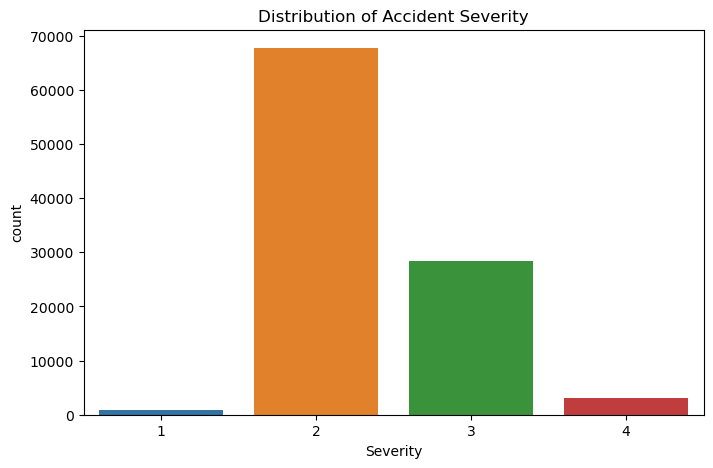

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Explore Severity of accidents
plt.figure(figsize=(8, 5))
sns.countplot(x='Severity', data=df_clean)
plt.title('Distribution of Accident Severity')
plt.show()


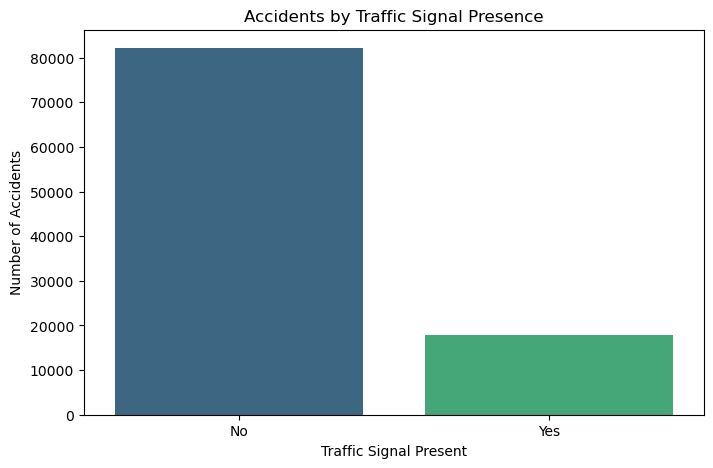

In [38]:
if 'TrafficSignal' in df_clean.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x='TrafficSignal', data=df_clean, palette='viridis')
    plt.title('Accidents by Traffic Signal Presence')
    plt.xlabel('Traffic Signal Present')
    plt.ylabel('Number of Accidents')
    plt.xticks([0, 1], ['No', 'Yes'])
    plt.show()
else:
    print("The 'TrafficSignal' column is not present in the dataset.")


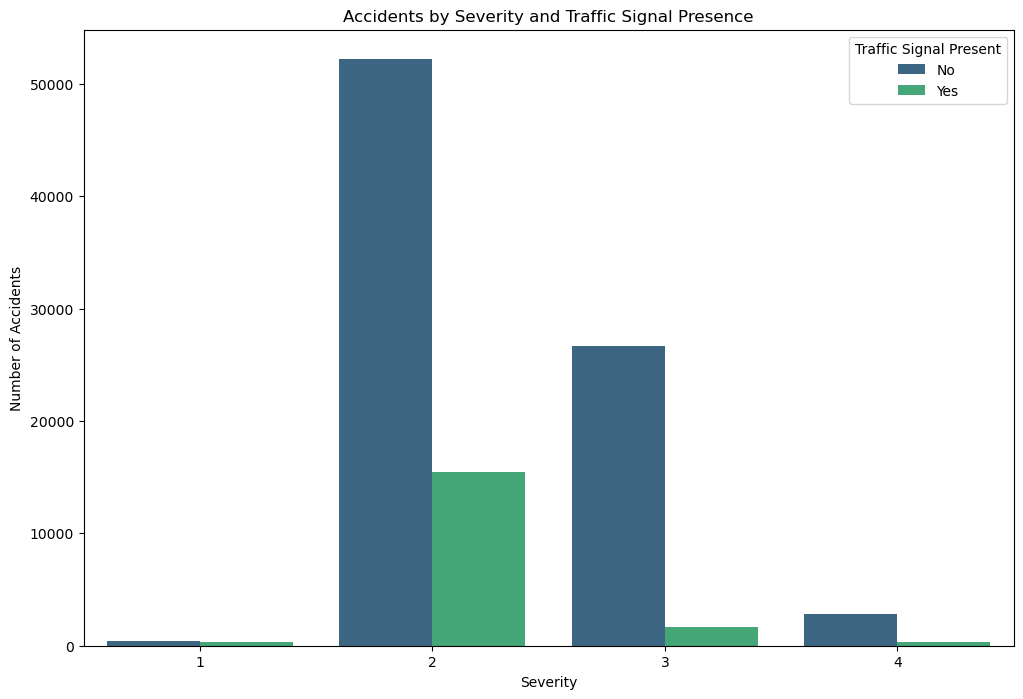

In [36]:
if 'TrafficSignal' in df_clean.columns:
    plt.figure(figsize=(12, 8))
    sns.countplot(x='Severity', hue='TrafficSignal', data=df_clean, palette='viridis')
    plt.title('Accidents by Severity and Traffic Signal Presence')
    plt.xlabel('Severity')
    plt.ylabel('Number of Accidents')
    plt.legend(title='Traffic Signal Present', labels=['No', 'Yes'])
    plt.show()
else:
    print("The 'TrafficSignal' column is not present in the dataset.")

In [41]:
from scipy.stats import chi2_contingency
# Statistical Analysis
if 'TrafficSignal' in df_clean.columns:
    severity_traffic_signal = pd.crosstab(df_clean['Severity'], df_clean['TrafficSignal'])
    print("Chi-square Test for Severity and Traffic Signal:")
    print(severity_traffic_signal)

    chi2, p, dof, expected = chi2_contingency(severity_traffic_signal)
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
else:
    print("TrafficSignal column is not available for chi-square analysis.")

Chi-square Test for Severity and Traffic Signal:
TrafficSignal  False   True
Severity                   
1                459    361
2              52213  15495
3              26659   1638
4               2832    343
Chi-square statistic: 4471.04869250832
P-value: 0.0


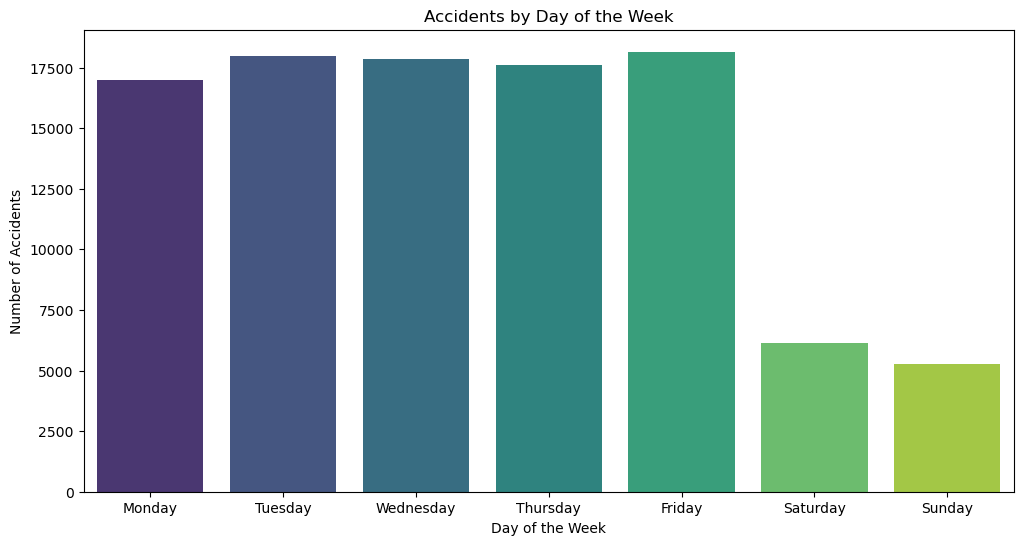

In [37]:
# Extract day of the week from StartTime if available
if 'StartTime' in df_clean.columns:
    df_clean['DayOfWeek'] = df_clean['StartTime'].dt.day_name()

    plt.figure(figsize=(12, 6))
    sns.countplot(x='DayOfWeek', data=df_clean, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
    plt.title('Accidents by Day of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Accidents')
    plt.show()
else:
    print("The 'StartTime' column is not present in the dataset.")

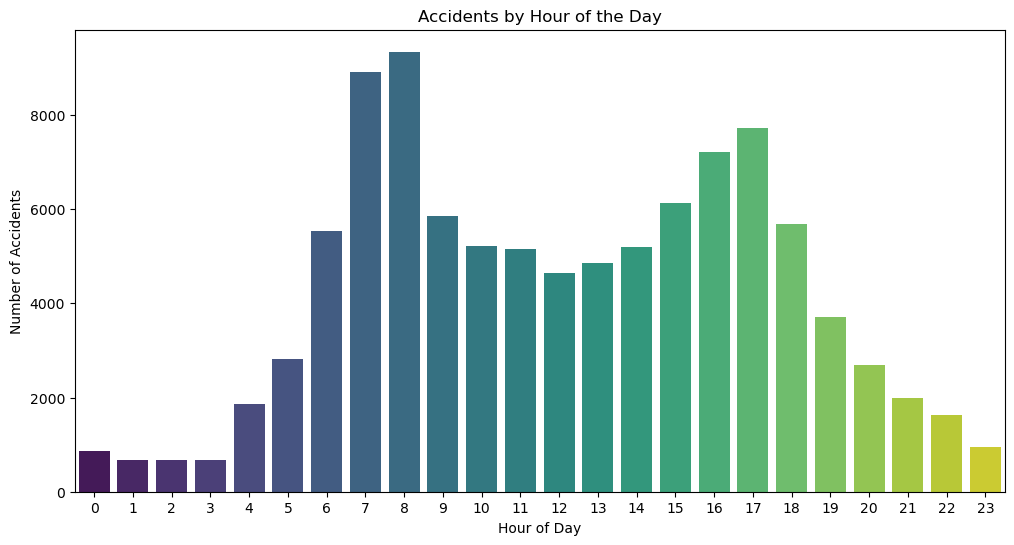

In [8]:
# Accidents Over Time
df_clean['Hour'] = df_clean['StartTime'].dt.hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df_clean, palette='viridis')
plt.title('Accidents by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

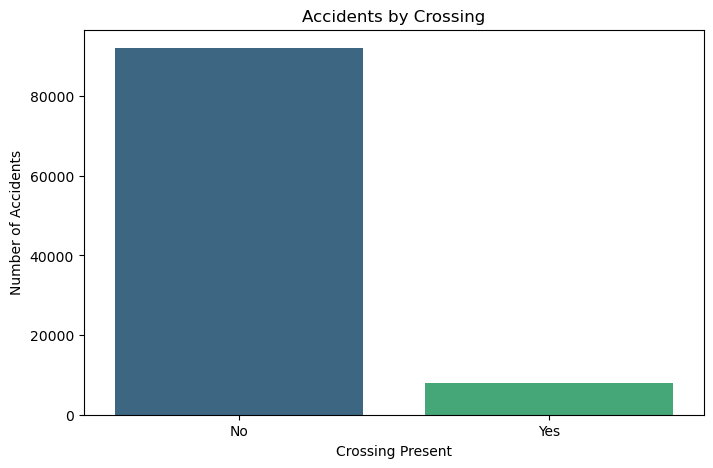

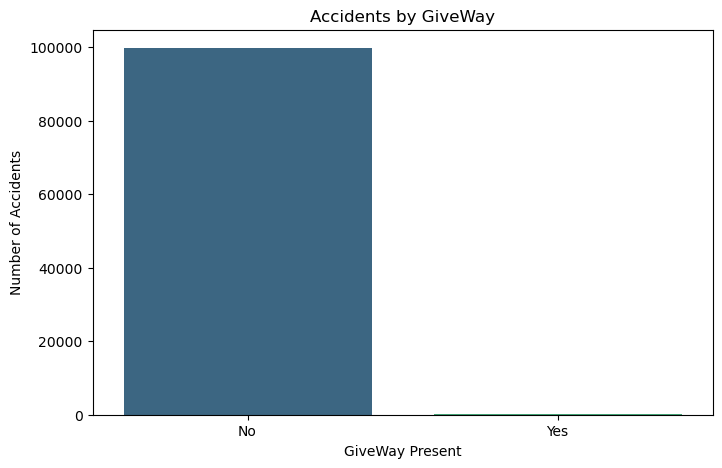

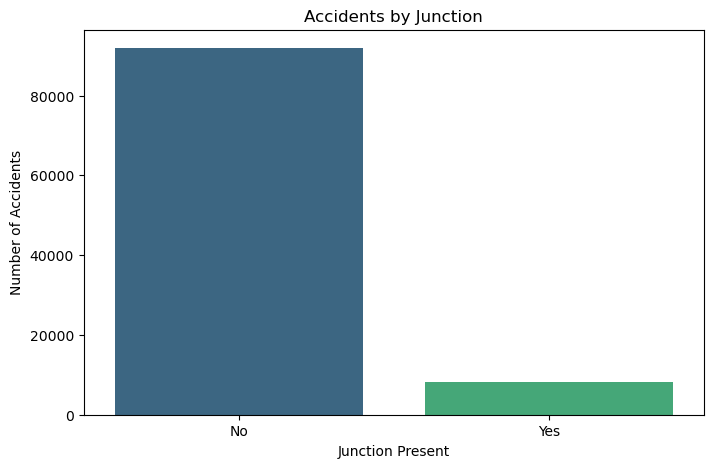

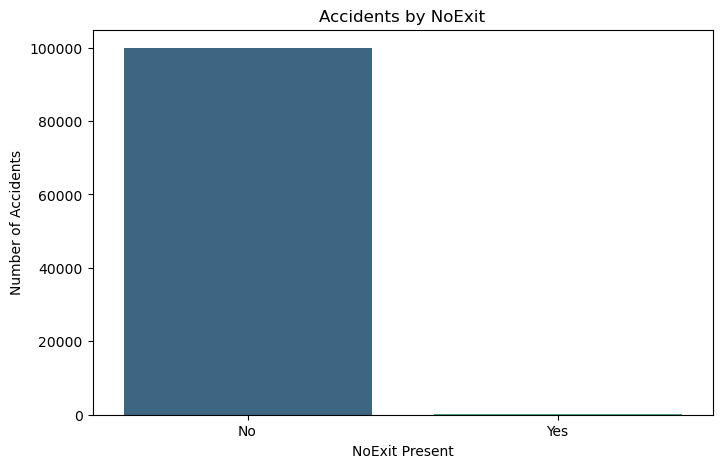

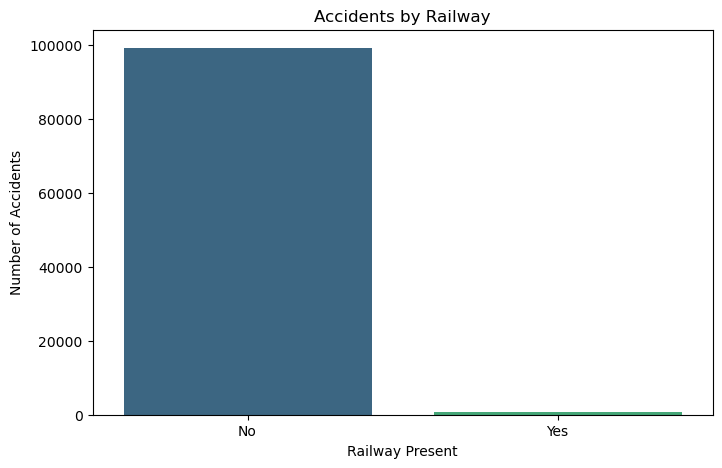

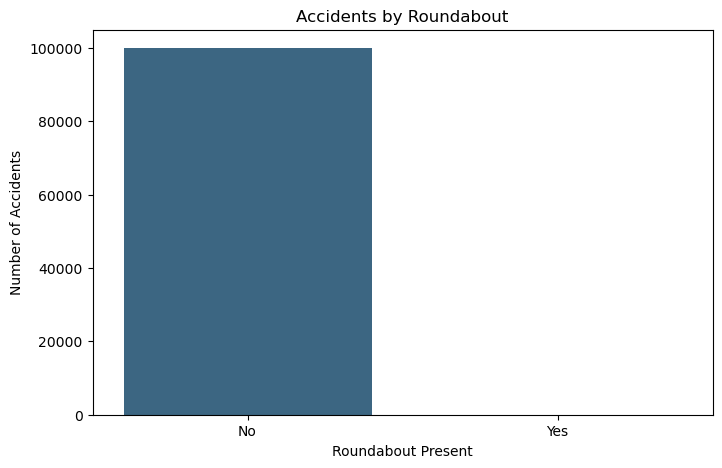

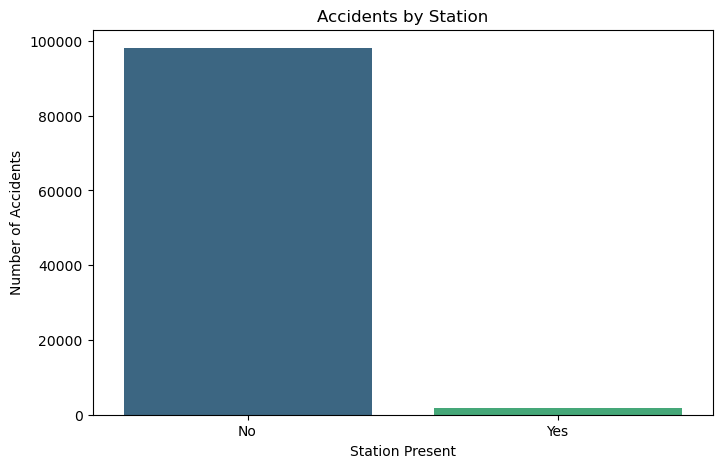

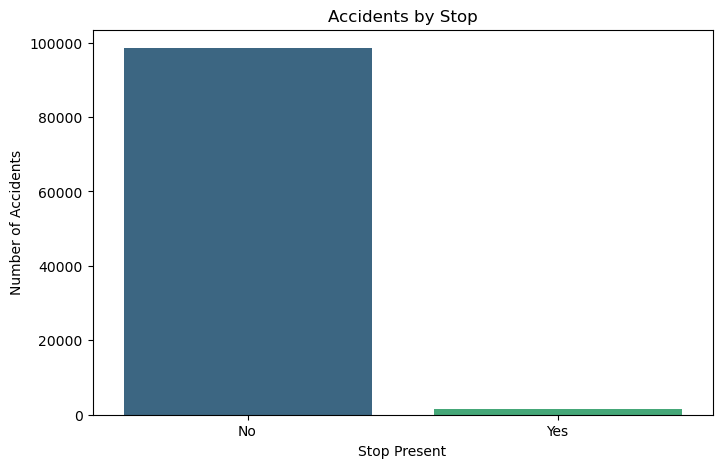

In [39]:
# Assuming you want to visualize multiple intersection features
features = ['Crossing', 'GiveWay', 'Junction', 'NoExit', 'Railway', 'Roundabout', 'Station', 'Stop']

for feature in features:
    if feature in df_clean.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(x=feature, data=df_clean, palette='viridis')
        plt.title(f'Accidents by {feature}')
        plt.xlabel(f'{feature} Present')
        plt.ylabel('Number of Accidents')
        plt.xticks([0, 1], ['No', 'Yes'])
        plt.show()
    else:
        print(f"The '{feature}' column is not present in the dataset.")


In [9]:

# Check if all relevant columns exist in the DataFrame
missing_cols = [col for col in relevant_columns if col not in df.columns]
if missing_cols:
    raise ValueError(f"Missing columns: {', '.join(missing_cols)}")

df_clean = df[relevant_columns].dropna()
df_clean['StartTime'] = pd.to_datetime(df_clean['StartTime'], errors='coerce')
df_clean['EndTime'] = pd.to_datetime(df_clean['EndTime'], errors='coerce')

# Map state abbreviations to full names
state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'
}

# Replace state abbreviations with full names
df_clean['State'] = df_clean['State'].map(state_mapping)

# Check for any null values after mapping
if df_clean['State'].isnull().any():
    print("Rows with null state values after mapping:")
    print(df_clean[df_clean['State'].isnull()])
    
    # Optionally, handle missing values
    df_clean['State'].fillna('Unknown', inplace=True)

Rows with null state values after mapping:
       Severity           StartTime             EndTime   StartLat   StartLng  \
373           2 2019-10-20 09:47:39 2019-10-20 11:18:11  38.946178 -76.978050   
612           3 2018-02-21 15:02:47 2018-02-21 21:02:47  38.887570 -77.024225   
3173          3 2020-04-22 17:09:17 2020-04-22 17:37:36  38.882550 -77.021900   
4170          4 2016-11-01 02:54:11 2016-11-01 08:54:11  38.908573 -77.015911   
6546          4 2019-06-20 19:52:26 2019-06-20 20:20:52  38.874923 -76.967764   
...         ...                 ...                 ...        ...        ...   
95478         2 2020-06-08 07:17:19 2020-06-08 07:47:00  38.889690 -76.959747   
95890         1 2020-03-25 18:02:10 2020-03-25 18:17:10  38.882260 -77.024000   
98602         3 2020-02-24 16:13:55 2020-02-24 17:37:41  38.845036 -77.006668   
98642         3 2016-07-18 18:42:10 2016-07-18 20:12:10  38.882347 -77.019592   
98908         4 2018-02-14 02:08:33 2018-02-14 08:08:33  38.912180

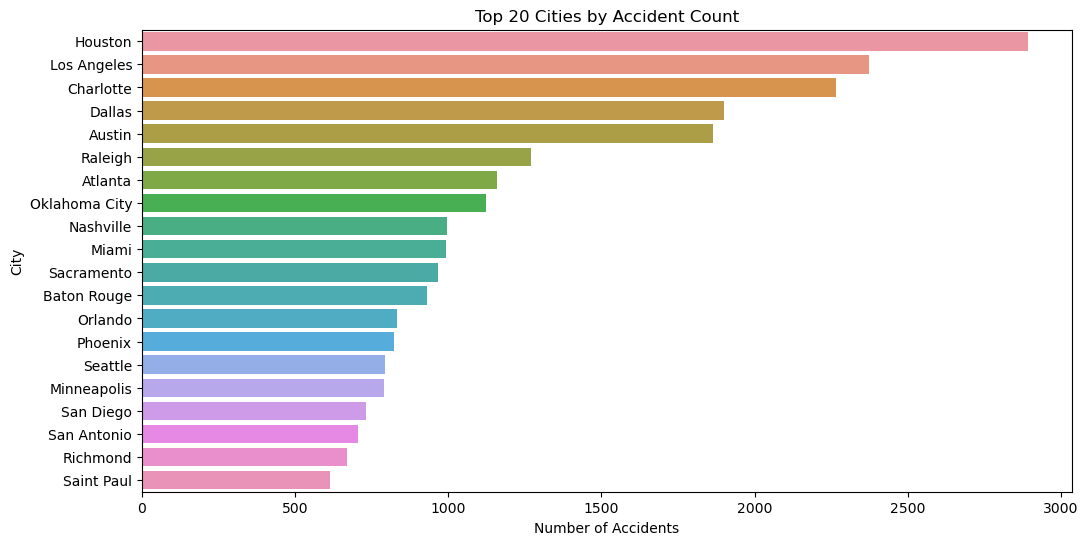

In [35]:

# Example: Explore accidents by City
plt.figure(figsize=(12, 6))
sns.countplot(y='City', data=df_clean, order=df_clean['City'].value_counts().index[:20])
plt.title('Top 20 Cities by Accident Count')
plt.xlabel('Number of Accidents')
plt.ylabel('City')
plt.show()


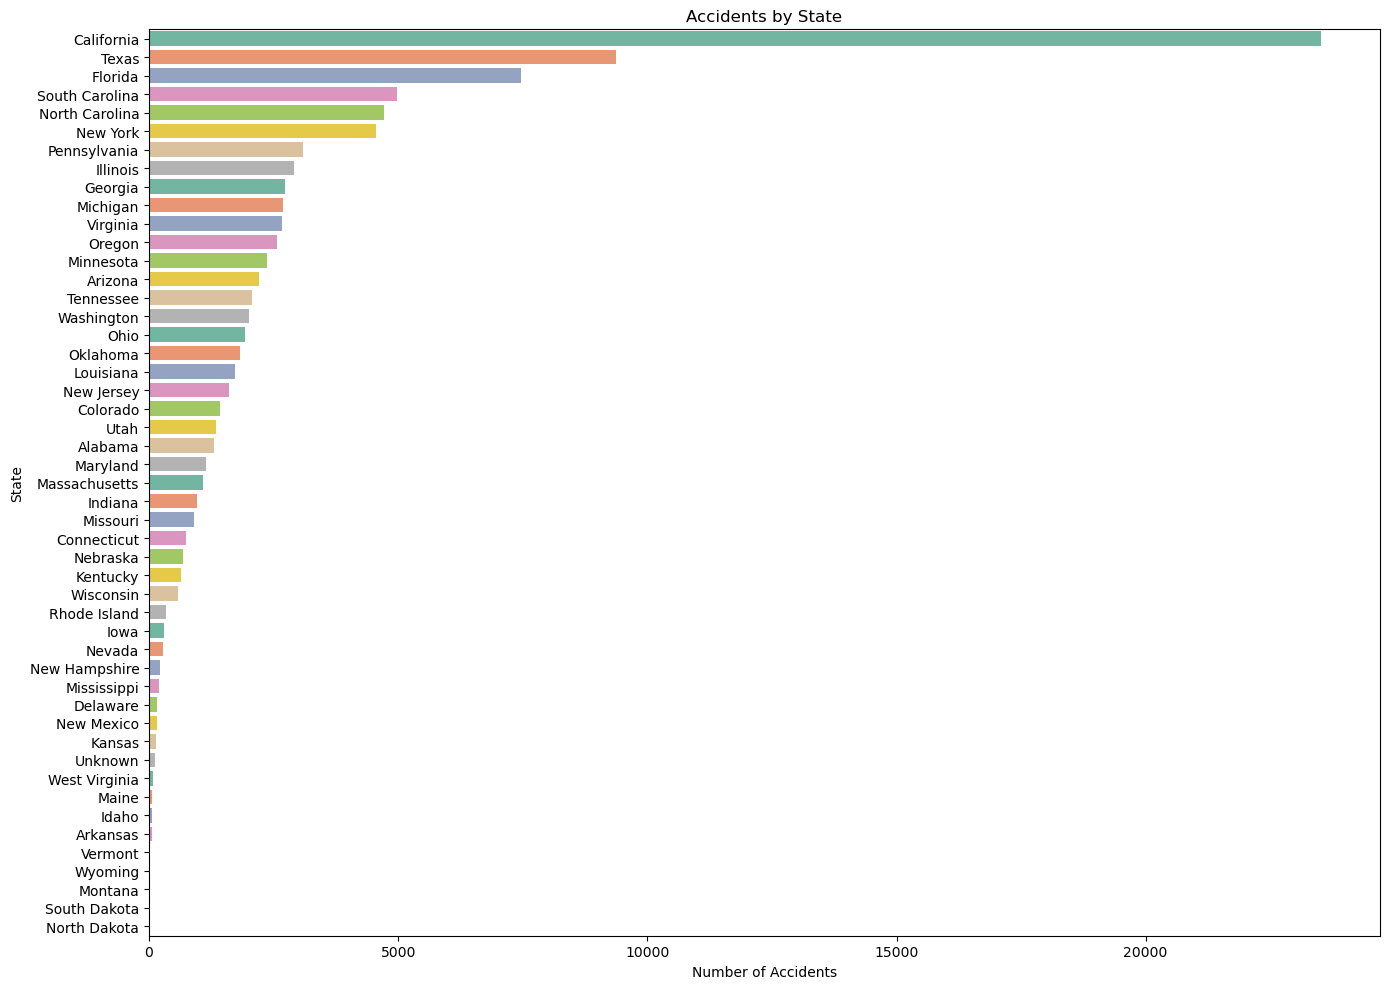

In [10]:
# Plot accidents by state
plt.figure(figsize=(14, 10))
state_order = df_clean['State'].value_counts().index
sns.countplot(y='State', data=df_clean, order=state_order, palette='Set2')  # Changed palette to 'Set2'
plt.title('Accidents by State')
plt.xlabel('Number of Accidents')
plt.ylabel('State')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [22]:
import folium
# Visualization of Accident Hotspots
accident_map = folium.Map(location=[df_clean['StartLat'].mean(), df_clean['StartLng'].mean()], zoom_start=5)

for _, row in df_clean.sample(1000).iterrows():
    folium.Marker([row['StartLat'], row['StartLng']]).add_to(accident_map)

# To display the map in a Jupyter notebook:
from IPython.display import display
display(accident_map)